## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

data = pd.read_csv("titanic.csv")

frame = pd.DataFrame(data["Survived"].value_counts())

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [3]:
set = data[["Sex","Survived"]]

M = set[set["Sex"] == "male"].count()
W = set[set["Sex"] == "female"].count()

Msurv = set[set["Sex"] == "male"][set["Survived"] == 1].count()
Wsurv = set[set["Sex"] == "female"][set["Survived"] == 1].count()

PercMsurv = Msurv * 100 / M
Perc_M = PercMsurv["Survived"].round(2)

PercWsurv = Wsurv * 100 / W
Perc_W = PercWsurv["Survived"].round(2)


print(f'Male:{Perc_M}%')
print(f'Woman:{Perc_W}%')

Male:18.89%
Woman:74.2%


**Задача 2:** Відтворіть ці графіки  
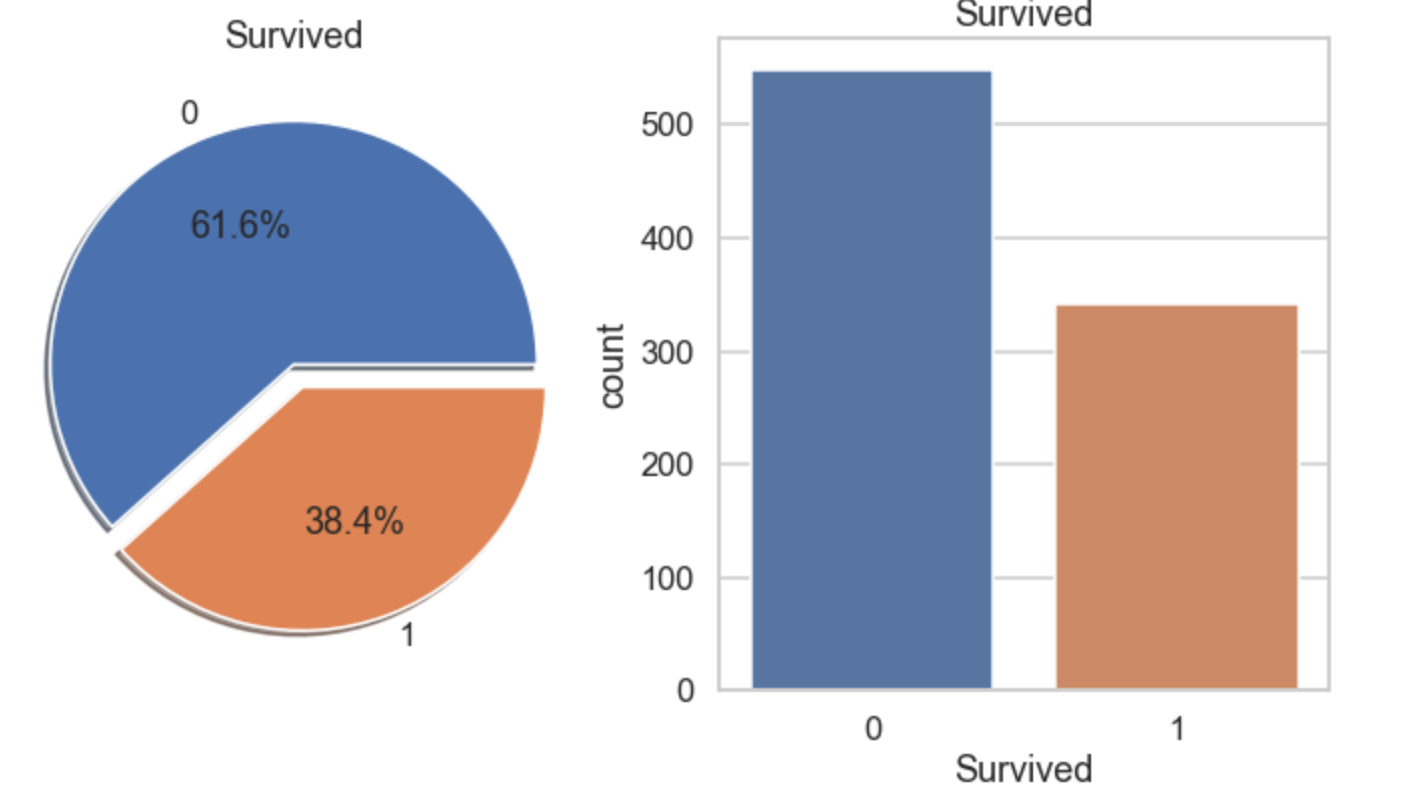


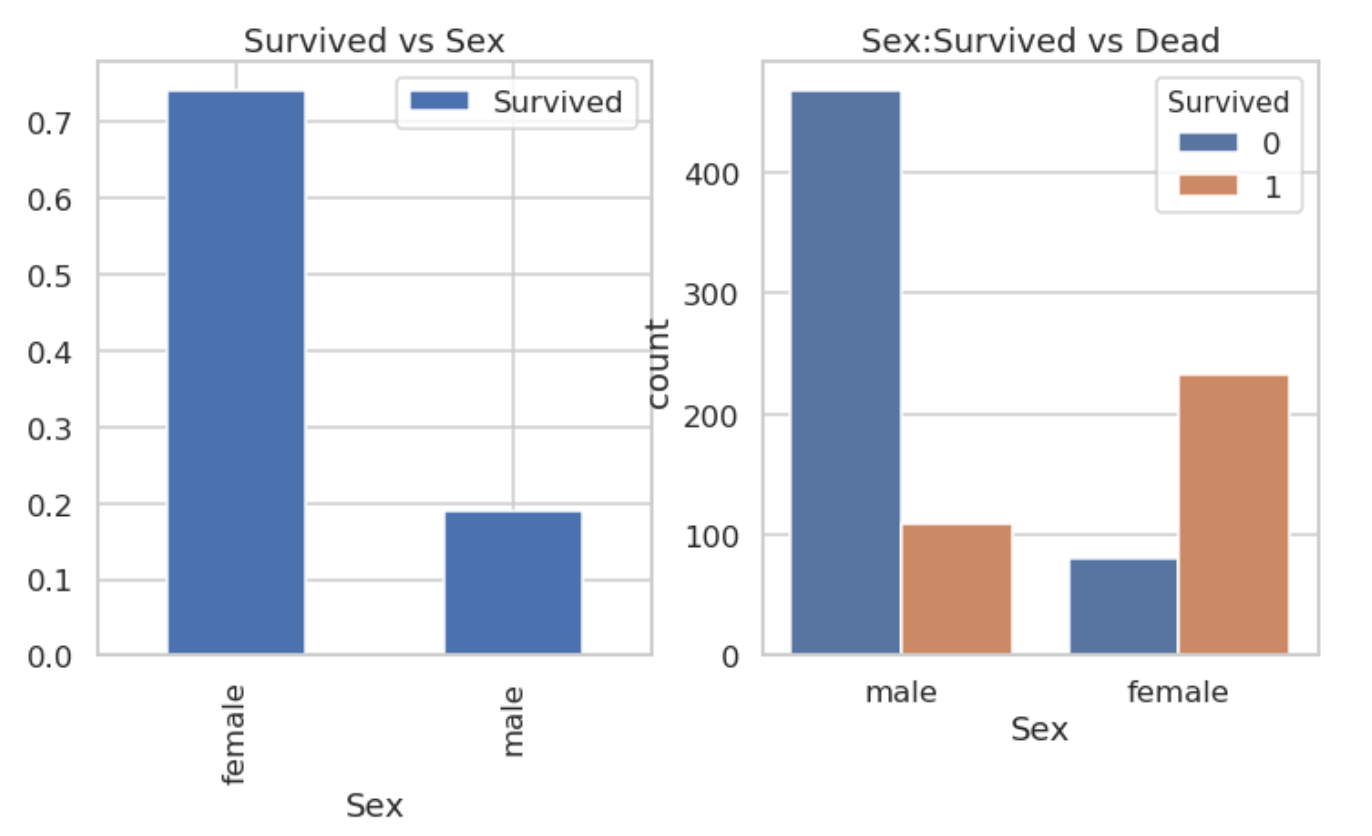

KeyError: 'Survived'

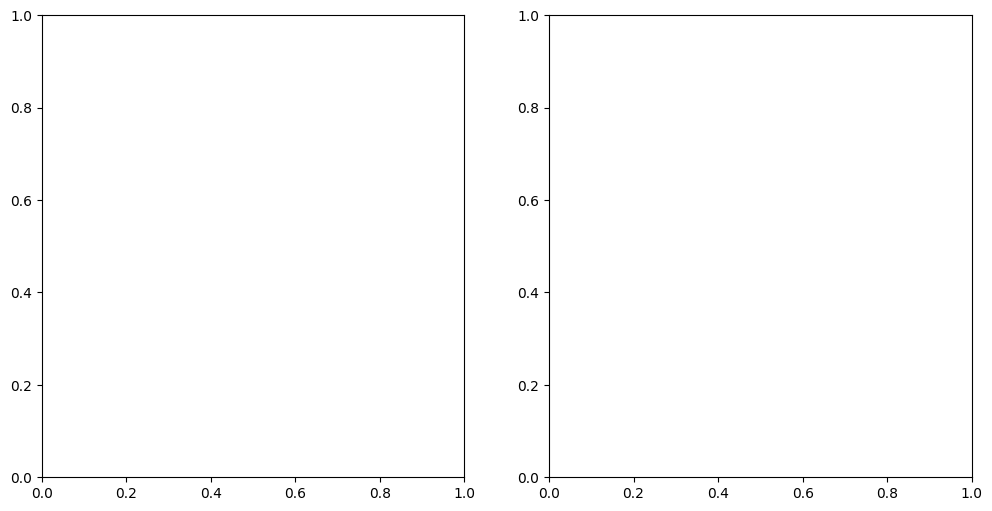

In [4]:
f,ax = plt.subplots(1,2,figsize = (12,6))

frame["Survived"].plot.pie(ax = ax[0], x = "Survived", explode = [0,0.05], autopct = '%1.1f%%')

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(ax = ax[1],x = 'Survived',data = set)

ax[1].set_title('Survived')
plt.show()

Висновок

 Кругова діаграма показує відсоткове співвідношення виживших і невиживших, виокремлюючи меншу групу для кращої видимості. Стовпчаста діаграма демонструє кількісний розподіл між цими двома категоріями, дозволяючи оцінити абсолютну кількість осіб в кожній. Обидва графіки разом надають повне уявлення про розподіл виживання в даних.


Text(0.5, 1.0, 'Survived')

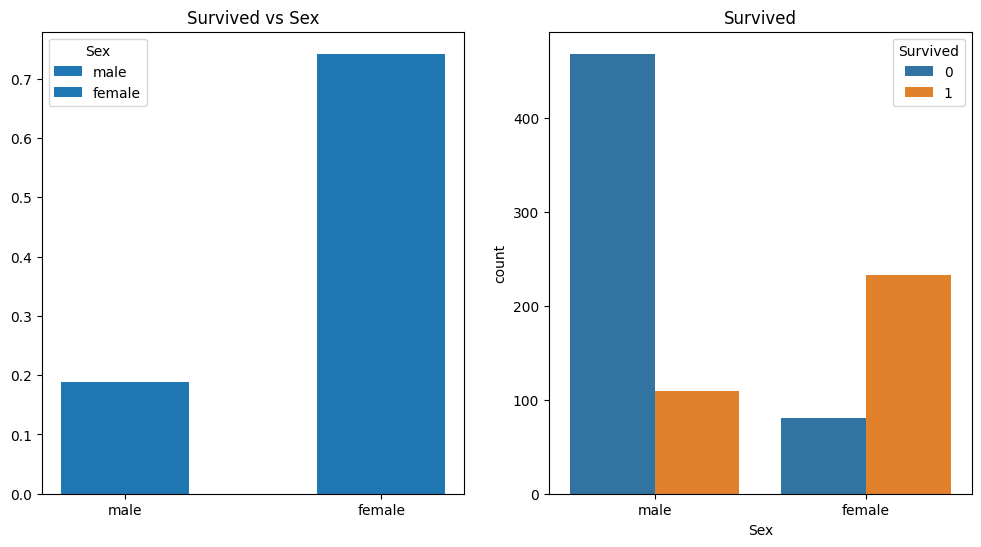

In [ ]:
f,ax = plt.subplots(1,2,figsize=(12,6))

labelN = ['male','female']
PercC = [Perc_M / 100, Perc_W / 100]

ax[0].bar(labelN,PercC, label = labelN, width = 0.5)
ax[0].set_title("Survived vs Sex")
ax[0].legend(title = "Sex")

sns.countplot(ax=ax[1],x = "Sex", data = set, hue = "Survived")

ax[1].set_title("Survived")

Висновок:
Перший стовпчастий графік порівнює відсоток виживших чоловіків та жінок, підкреслюючи значний вплив статі на шанси виживання. Другий графік з даними по статі та виживанню деталізує кількість виживших і невиживших, дозволяючи глибше зрозуміти цю динаміку. Разом вони ефективно ілюструють, як стать впливає на виживання в критичних ситуаціях.

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [ ]:
name = data[["Name" , "Sex"]]
setofNames = name[data["Sex"] == "female"]
NameFemale = setofNames["Name"]

wNames = []

def FindNames(status):
  for i in NameFemale:
    if status in i:
      wNames.append(i.replace(")","").split(status)[1].split()[0])

def NotFindName(status):
  for i  in NameFemale:
    if status not in i:
      wNames.append(i.replace(")","").split()[2:][0])



FindNames("(")
NotFindName("(")


FemaleFrame = pd.Series(wNames)
print(FemaleFrame.value_counts().head(1))

Anna    15
dtype: int64


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [ ]:
mName = data[["Name" , "Sex"]]
mnameSet = mName[data["Sex"] == "male"]
NameMale = mnameSet["Name"]

mNames = []


def FindName(status):
  for i in NameMale:
    if status in i:
      mNames.append(i.split(status)[1].split()[0])




FindName("Mr. ")
FindName("Dr. ")
FindName("Master. ")
MaleFrame = pd.Series(mNames)
print(MaleFrame.value_counts().head(1))

William    35
dtype: int64


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
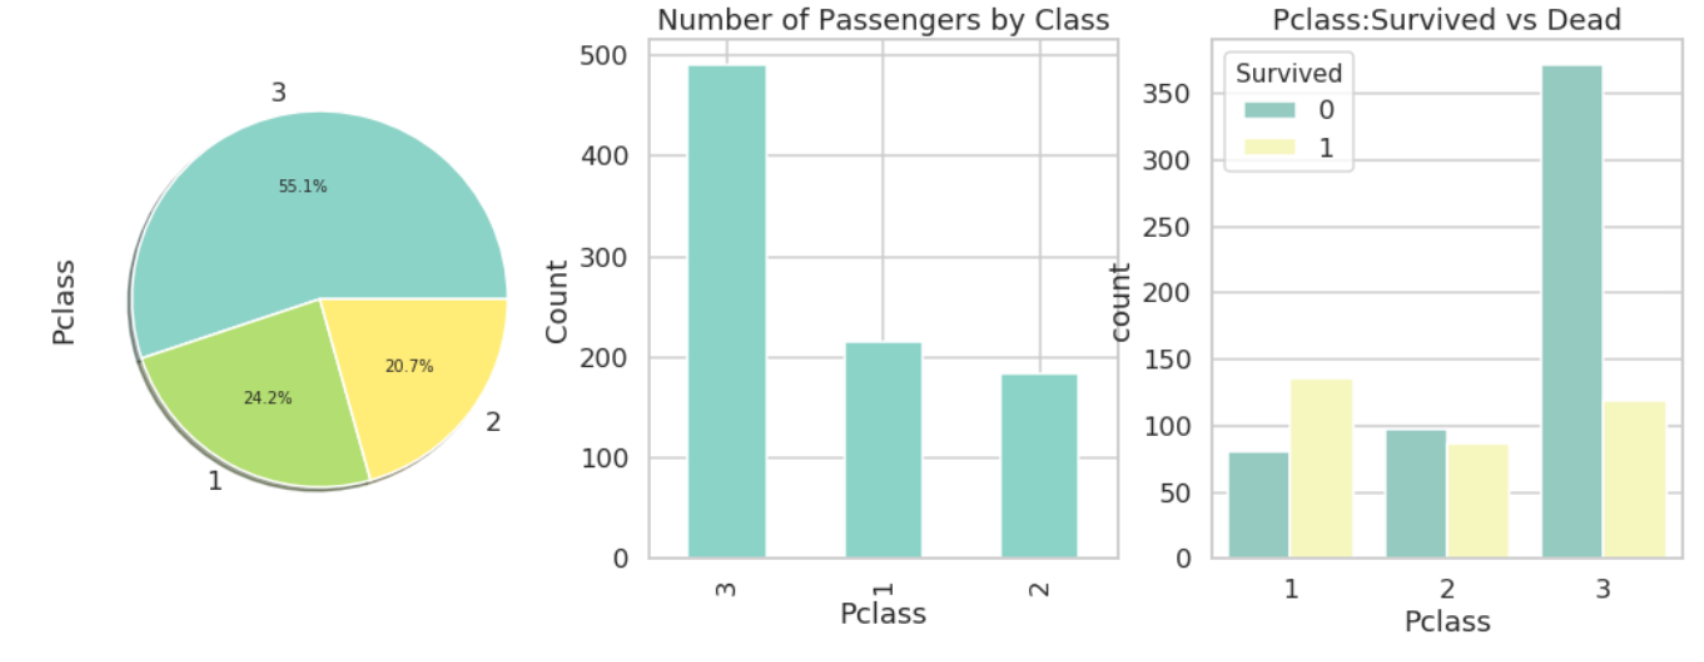

Text(0.5, 1.0, 'Pclass: Survived vs Dead')

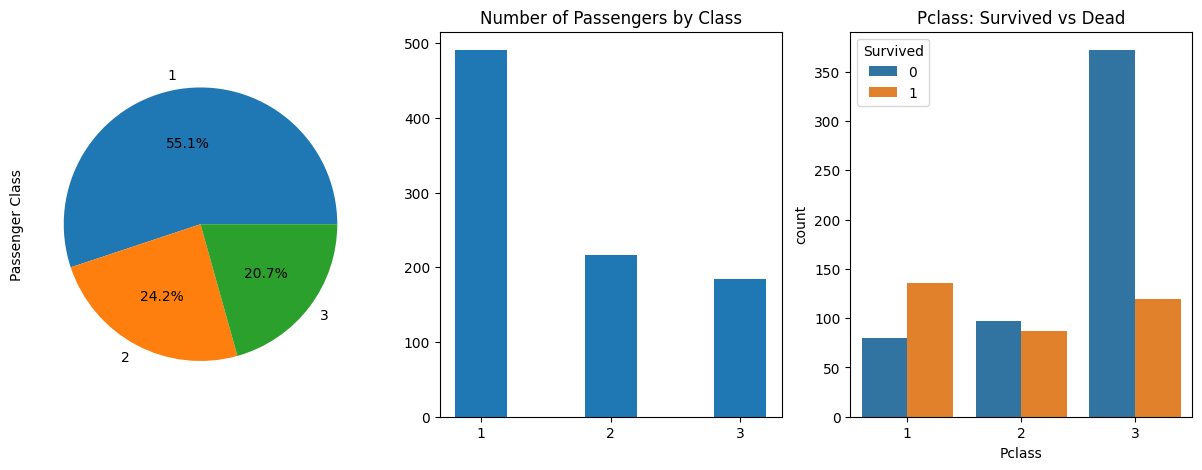

In [ ]:
f,ax = plt.subplots(1,3,figsize = (15,5))
ClassOfPass = sorted(data.groupby("Pclass").PassengerId.count(), reverse=True)

ax[0].pie(labels=["1","2","3"], x = ClassOfPass, autopct = '%1.1f%%')
ax[0].set_ylabel('Passenger Class')

ax[1].bar(["1","2","3"], ClassOfPass, width = 0.4)
ax[1].set_title("Number of Passengers by Class")

sns.countplot(ax = ax[2], x = "Pclass", hue = "Survived", data = data)
ax[2].set_title('Pclass: Survived vs Dead')

Висновок


Перший графік - кругова діаграма, показує розподіл пасажирів за класом. За допомогою цієї діаграми видно, що більшість пасажирів були третього класу, в той час як пасажирів першого та другого класу було менше, відповідно 24.2% та 20.7% від загальної кількості пасажирів.


Другий графік - стовпчаста діаграма, демонструє кількість пасажирів за кожним класом. Він також підтверджує, що третій клас мав найбільшу кількість пасажирів, в той час як перший клас був найменшим за кількістю.

Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
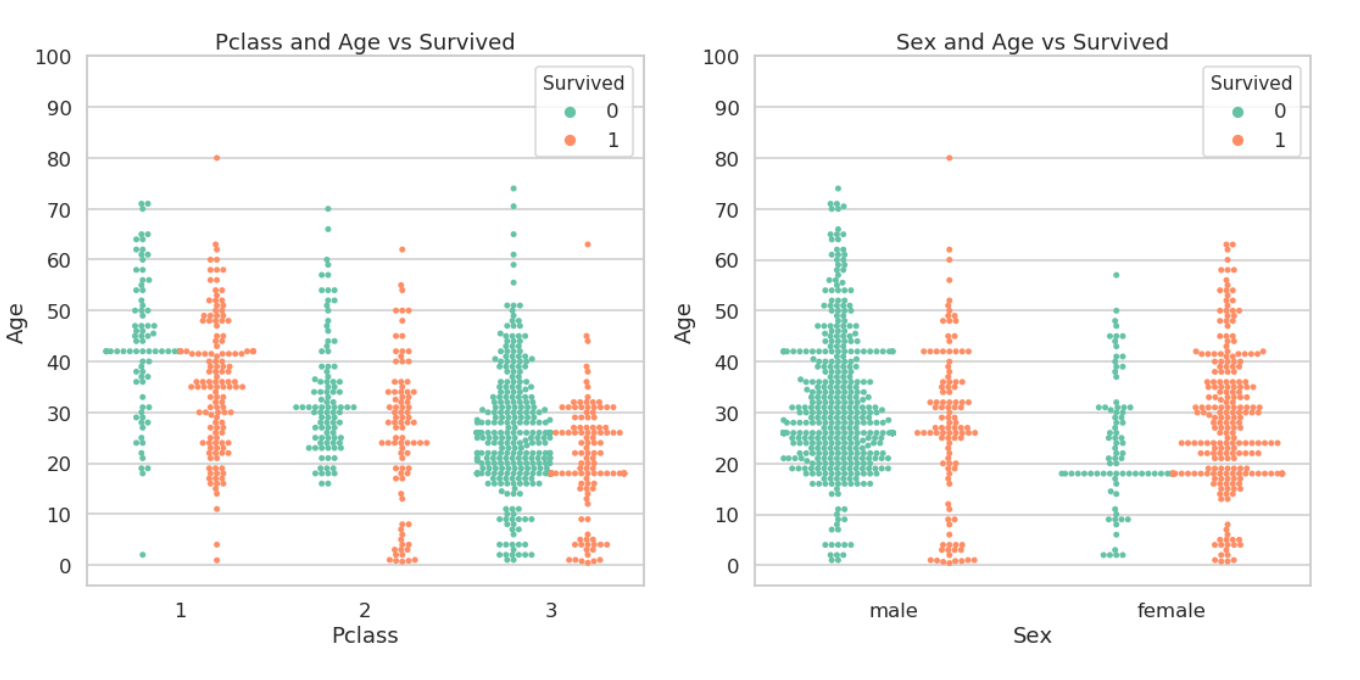![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

[Text(0.5, 1.0, 'Sex and Age vs Survived')]

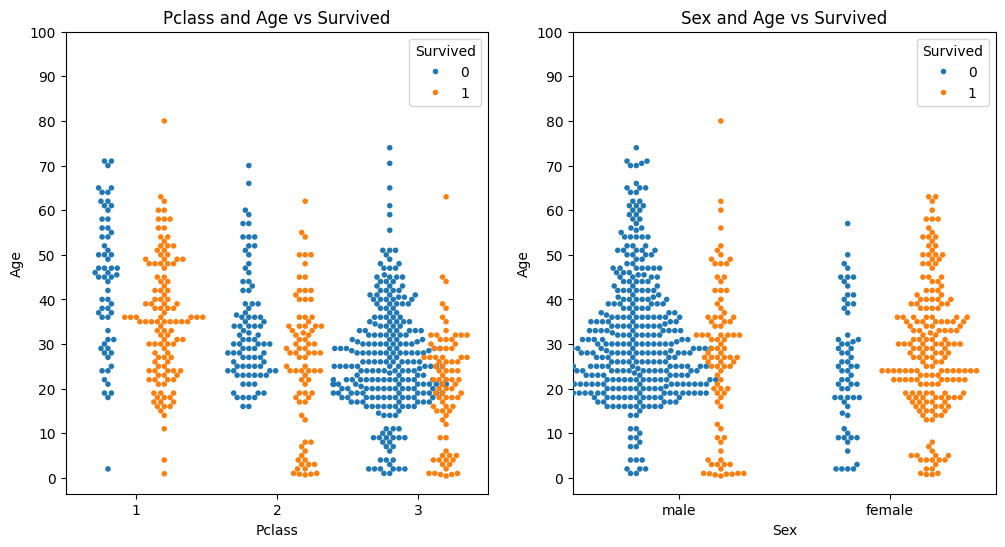

In [ ]:
f,ax = plt.subplots(1,2, figsize = (12,6))

sns.swarmplot(ax=ax[0], data = data, x = "Pclass", y = "Age", hue = "Survived", dodge = True, order = ["1","2","3"], size = 4)

ax[0].set_yticks(np.arange(0,101,10))
ax[0].set(ylabel="Age")
ax[0].set(title = "Pclass and Age vs Survived")

sns.swarmplot(ax=ax[1], data = data, x = "Sex", y = "Age", hue = "Survived", dodge = True, size = 4)

ax[1].set_yticks(np.arange(0,101,10))
ax[1].set(title = "Sex and Age vs Survived")

Висновок

Ці графіки використовуються для порівняння вікового розподілу пасажирів за класом та за статтю відносно того, вижив пасажир чи ні. Перший графік розглядає віковий розподіл пасажирів в залежності від класу, тоді як другий графік порівнює віковий розподіл за статтю. Середній вік пасажирів першого класу більше, ніж у пасажирів другого та третього класів, що може свідчити про стабільнішу соціальну позицію цієї категорії пасажирів. На обох графіках можна помітити, що в молодшій віковій групі спостерігається вищий відсоток виживших порівняно з іншими віковими групами, що може свідчити про віддачу пріоритету дітям під час евакуації. Діти - це головне!

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

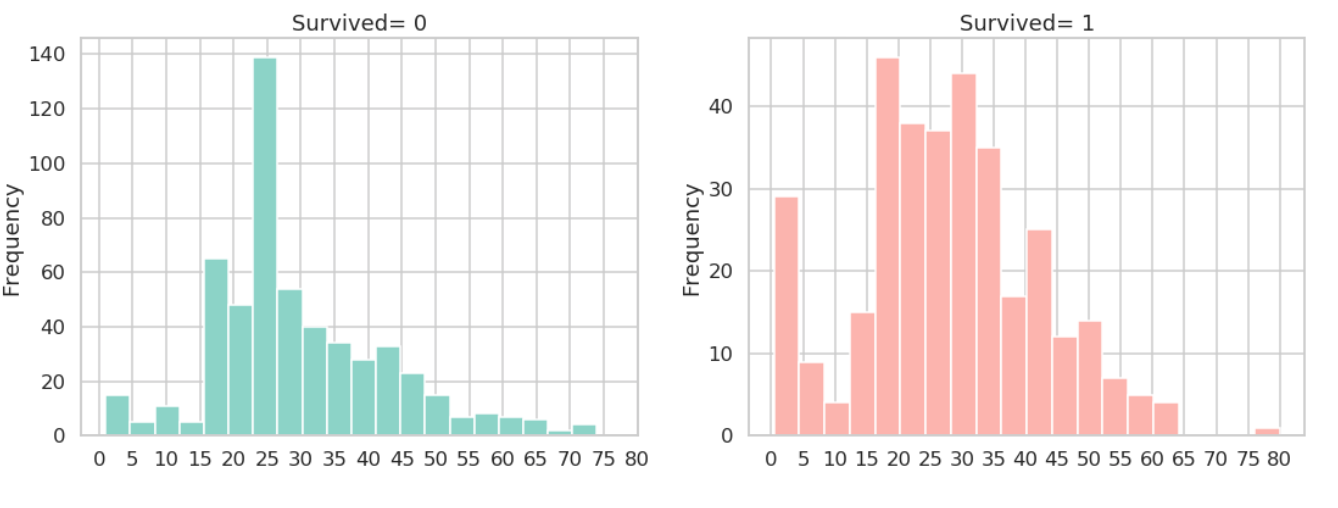



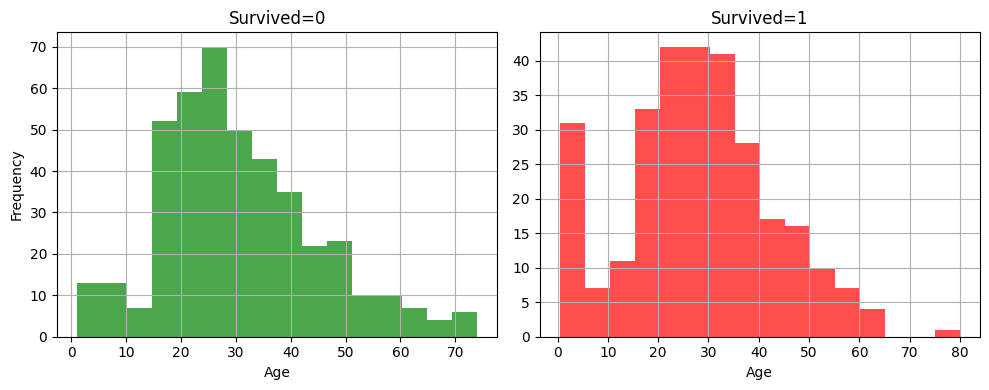

In [ ]:
data.dropna(subset=['Age'], inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

data[data['Survived'] == 0]['Age'].hist(ax=axes[0], bins=16, color='green', alpha=0.7)
axes[0].set_title('Survived=0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

data[data['Survived'] == 1]['Age'].hist(ax=axes[1], bins=16, color='red', alpha=0.7)
axes[1].set_title('Survived=1')
axes[1].set_xlabel('Age')

plt.tight_layout()

plt.show()

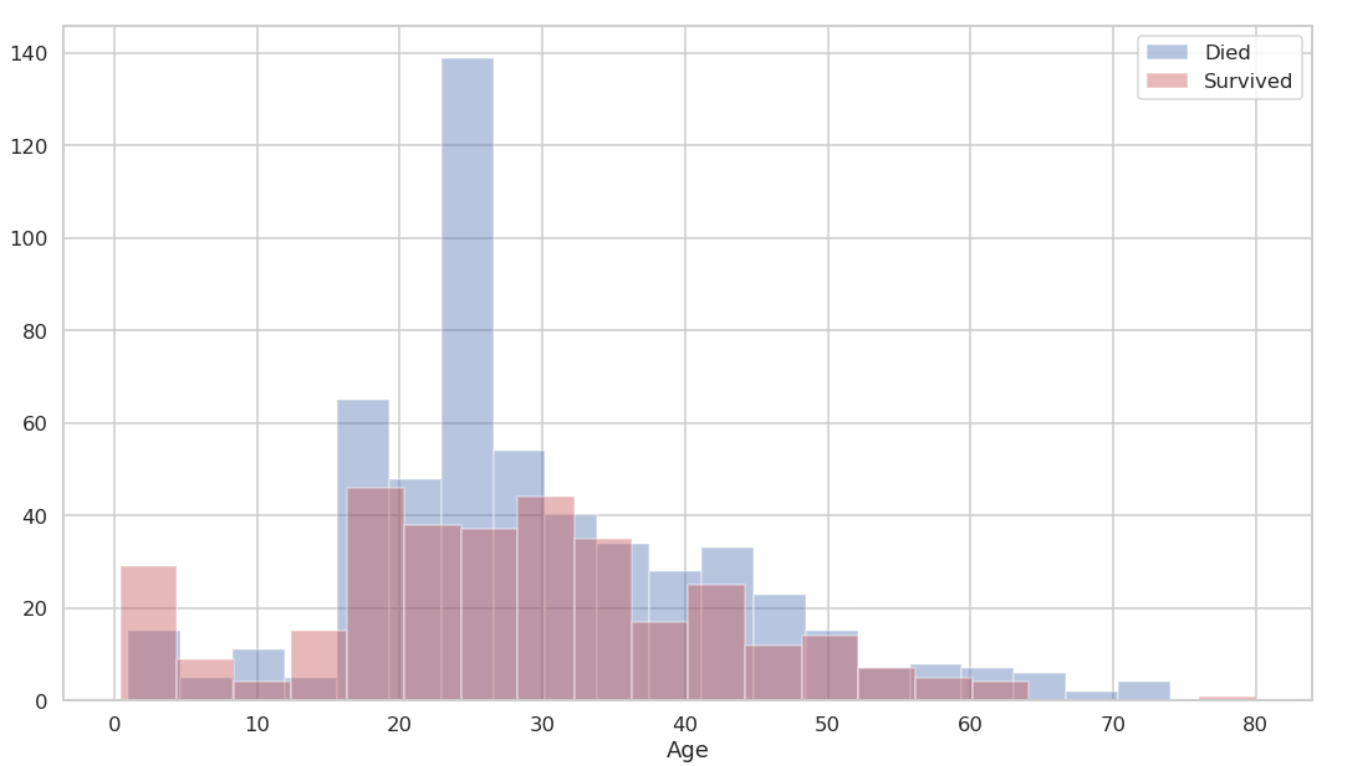

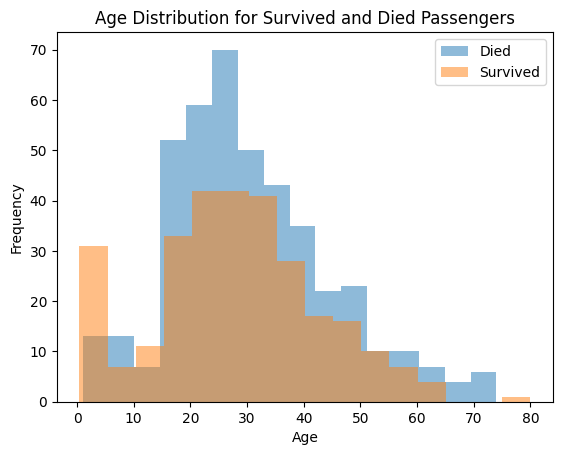

In [ ]:
data = data.dropna(subset=['Age'])

plt.hist(data[data['Survived'] == 0]['Age'], bins=16, alpha=0.5, label='Died')
plt.hist(data[data['Survived'] == 1]['Age'], bins=16, alpha=0.5, label='Survived')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Survived and Died Passengers')

plt.legend(loc='upper right')

plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


Ці гістограми показують,що люди в віці підліткового або молодого віку(20 років тощо) утворюють найбільшу групу серед тих хто вижив і серед тих хто не вижив. Розподіл тих,хто не вижив є більш спотвореним і цих візуалізацій не достатньо,щоб зробити більш точні висновки.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
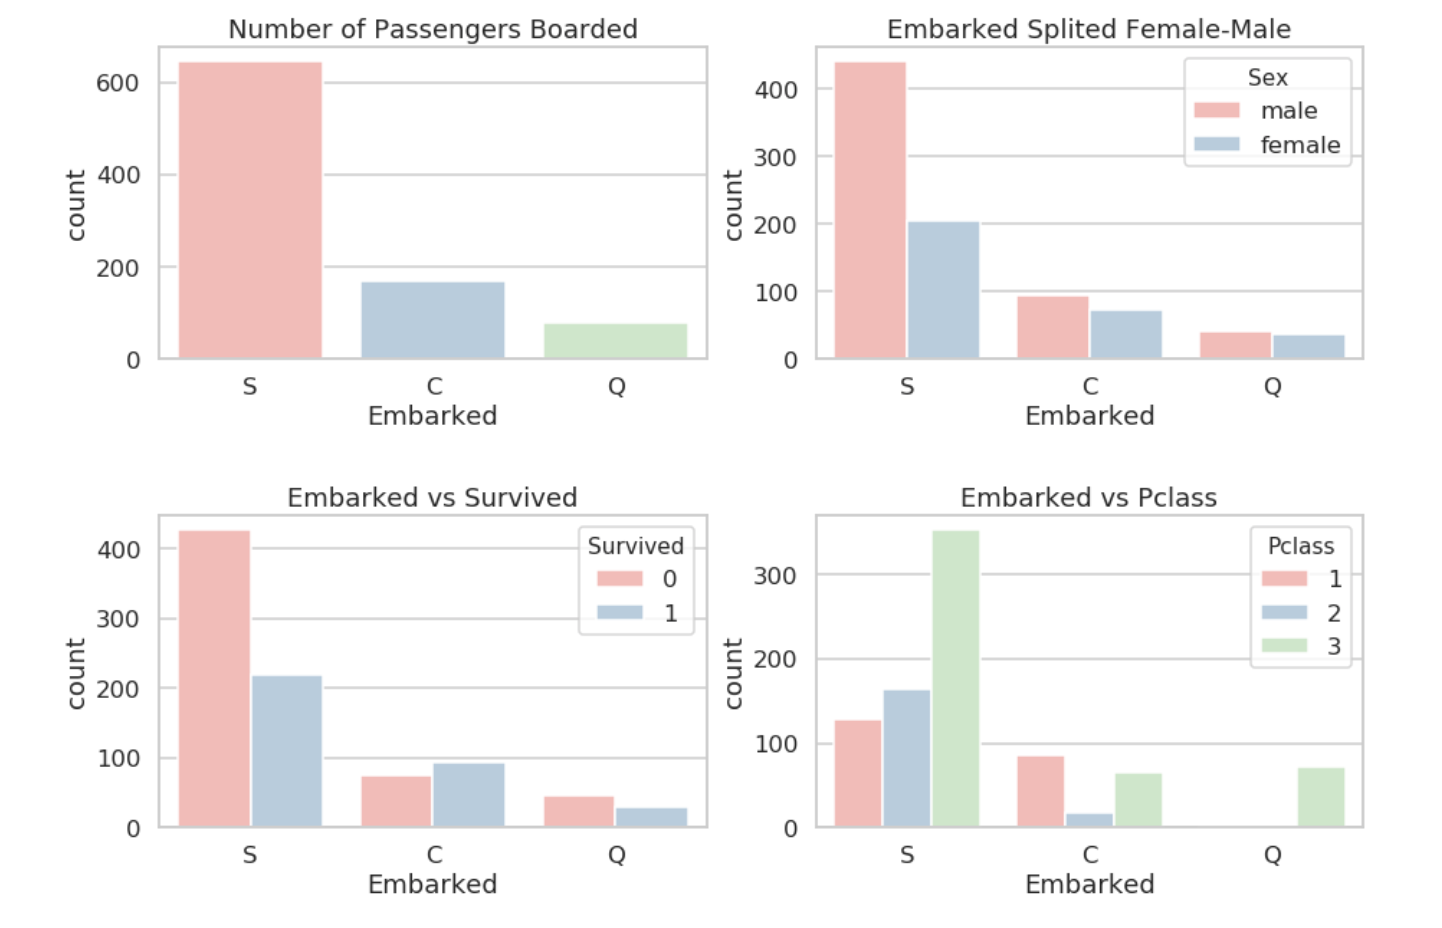

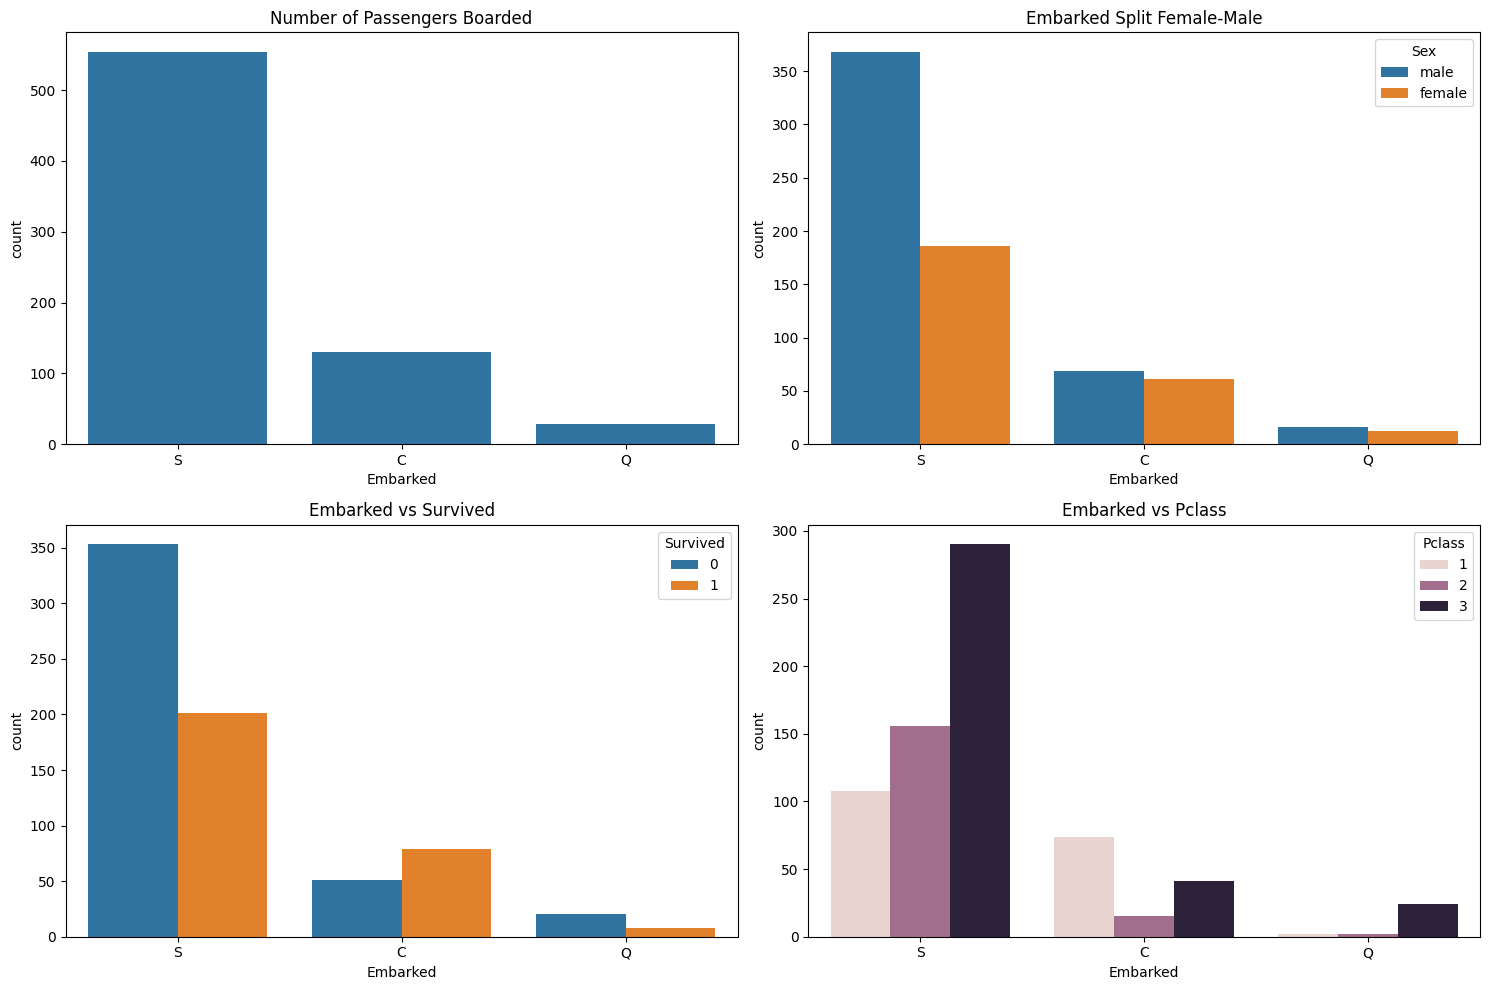

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Embarked', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Number of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Embarked Split Female-Male')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Embarked vs Pclass')

plt.tight_layout()
plt.show()

Стовпчасті діаграми показують,що більшість пасажирів прибули з Саутгемптона, а Шербур і Квінстаун мали поступово менше пасажирів. Розподіл за статтю відрізнявся залежно від порту: у Саутгемптоні та Шербурі було завантажено більше чоловіків, ніж жінок. Квінстаун виглядає більш збалансованим.Рівень виживання був вищим для пасажирів, які сідали в Шербурзі, порівняно з пасажирами з Саутгемптона та Квінстауна. Ці візуалізації свідчать про те, що місце посадки, стать і клас були факторами виживання

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

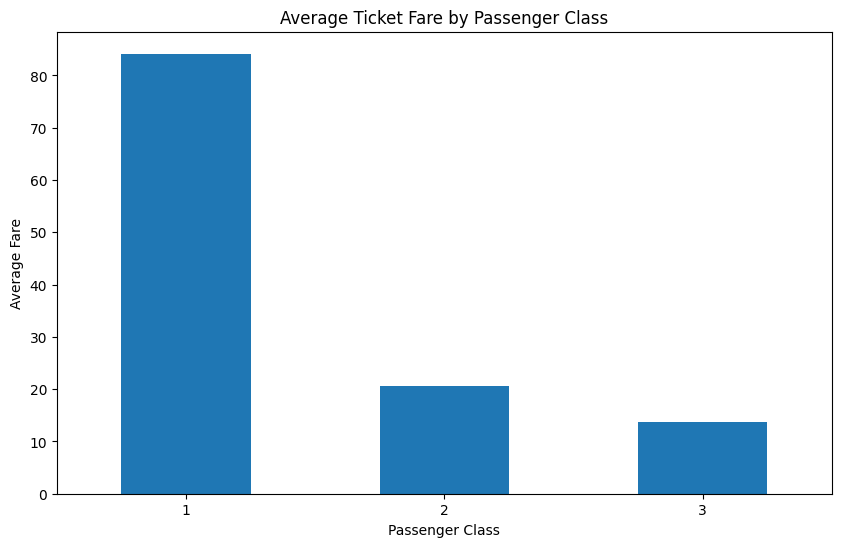

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("titanic.csv")

class_fare_data = data[['Pclass', 'Fare']]

class_fare_mean = class_fare_data.groupby('Pclass').mean()

class_fare_mean.plot(kind='bar', figsize=(10, 6), legend=None)
plt.title('Average Ticket Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


Прокоментуйте побудовані графіки

Цей графік показує розподіл вартості квитка для кожного класу пасажира за допомогою статистичних метрик, таких як медіана, квартилі та потенційні викиди.З графіка видно, що середня вартість квитка зростає з нижнього класу до верхнього, що означає, що пасажири верхнього класу платили більше за квитки порівняно з пасажирами нижнього класу.Обидва графіки допомагають нам зрозуміти відносну вартість квитків у кожному класі пасажирів та виявити будь-які потенційні викиди або аномалії у розподілі вартості квитків.Вартість квитків для пасажирів 1-го класу має найширший діапазон, що вказує на те, що ціни на квитки для цього класу можуть значно відрізнятися. Середня вартість квитка зростає з класом пасажира,а це означає, що в середньому квитки для пасажирів першого класу коштують найбільше, а квитки для пасажирів третього класу найменше.